# Task 4

First, update the following cell to have a link to your Homework 1 GitHub repository:

UPDATE THIS LINK:

https://github.com/mariamkg00/eds220-hwk-1

In this task, make at least 5 commits at moments you think are adequate. We'll look at your repo to check commit history. Err on the side of commenting too much for now to get in the habit.

Add comments for all your code. Err on the side of commenting too much for now.

Comments in each exercise and commits will count towards your grade.

This task covers topics we will see on Wednesday Oct. 11. You might want to wait until after that class to solve it.

## Acknowledgement
This task was adapted from the *Pandas Fundamentals with Earthquake Data* assignment from the e-book [Earth and Environmental Data Science](https://earth-env-data-science.github.io/intro.html)

## About the data

For this task we are going to use simplified data from the [USGS Earthquakes Database](https://earthquake.usgs.gov/earthquakes/search/). This dataset is in tabular format and has the following columns:

- time = date and time of event (all events from 2014)
- latitude = decimal degrees [-90,90]
- longitude = decimal degrees [-360,360]
- depth = depth of the event (km)
- mag =  magnitude of event
- id = event identifier
- place = where the event took place
- type = type of event

## 1 

a. Import pandas (always with standard abbreviation!).

b. Use `pd.read_csv()` to import the `earthquake_data.csv` dataset and store it as `raw_eqk` (variable name).

c. Look at the head of the dataframe.

In [4]:
# a. importing pandas
import pandas as pd

# b. using pd.read_csv to import earthquake data
raw_eqk = pd.read_csv('data/earthquake_data.csv')

# c. looking at head of dataframe
raw_eqk.head()

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ak11151142,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ak11151135,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ci37171541,"10km WNW of Progreso, Mexico",earthquake


## 2
a. Print the shape of the `raw_eqk` dataframe.

b. Print the type of `raw_eqk`'s shape.

c. Print *only* the number of rows by accessing it from `raw_eqk`'s shape. HINT: how do you index an element in a tuple?

In [11]:
# a. printing the shape of the raw_eqk data frame to see how many rows and columns are in it
print(raw_eqk.shape)
# there are 120108 rows and  8 columns in this dataset. 

(120108, 8)


In [32]:
# b. printing the type of the dataframe raw_eqk's shape is
print(type(raw_eqk.shape))

#the type of shape raw_eqk is a tuple

<class 'tuple'>


In [26]:
# c. printing only the number of rows from the dataframe from the shape.
len(raw_eqk.shape.axes[0])

AttributeError: 'tuple' object has no attribute 'axes'

## 3

Get the unique values of the type of events.

In [29]:
# using the unique function
raw_eqk['type'].nunique()

# 11 different types of events in this dataframe. 

11

# 4

a. Select only earthquake events and store them as `eqk` (variable name)

b. Update the index of `eqk` to be the `id` column of the dataframe. 

c. Check the new index by viewing the first 3 rows of `eqk`.

In [41]:
# a. selecting only earthquake events and storing them as eqk

eqk = raw_eqk.loc[raw_eqk.type == 'earthquake']


#b. using the set_index() function
eqk = eqk.set_index('id')

#c. using head(3) to preview the first three rows of eqk
eqk.head(3)

,time,latitude,longitude,depth,mag,place,type
id,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.2520,-152.7081,90.2,1.10,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.0703,-115.1309,0.0,1.33,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.6717,-149.2528,7.1,1.30,"12km NNW of North Nenana, Alaska",earthquake


# 5

How many events were left out of `raw_eqk` when you selected ony earthqake events? 

HINT: There are *many* ways you can get this information. One could be to use (2).

In [43]:
# printing out the total number of different event types
raw_eqk.type.nunique()

11

10 events were left out when I only selected earthquake events. 

# 6
Without creating any new variables, plot a histogram of the eartquake's magnitudes (`eqk` data). Add a title and change the color of your graph.

<AxesSubplot:title={'center':'Frequencies of Earthquake Magnitudes'}, ylabel='Frequency'>

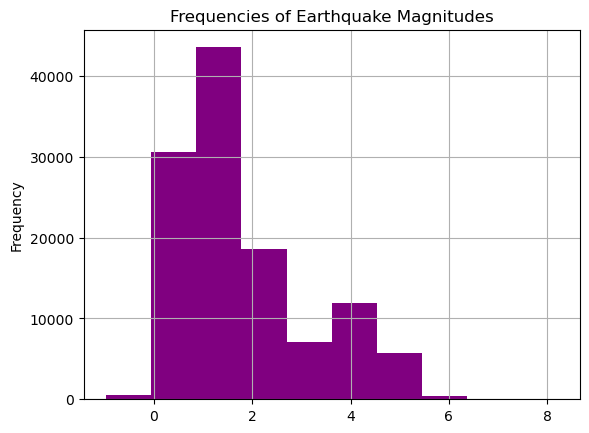

In [53]:
# kind = 'hist', x = mag
eqk.mag.plot(kind = 'hist',
                x = 'mag',
            color = 'purple',
             grid = True,
            xlabel= 'Earthquake Magnitude',
            title = 'Frequencies of Earthquake Magnitudes')


# 7

a. Create a new variable `top20` with the 20 earthquakes with largest magnitude. HINT: [`pandas.Series.nlargest`](https://pandas.pydata.org/docs/reference/api/pandas.Series.nlargest.html)

b. Create a bar plot showing the magnitude of the top 20 earthquakes. Update the title, x-axis label, y-axis label, and color of the bars. 

c. What is the role of the `top20` index in the graph? What would have happened if we had not updated the index?

In [110]:
# a. using nlargest to make new variable top20
top20 = eqk.mag.nlargest(20)

top20


502

<AxesSubplot:xlabel='Earthquake ID', ylabel='Magnitude'>

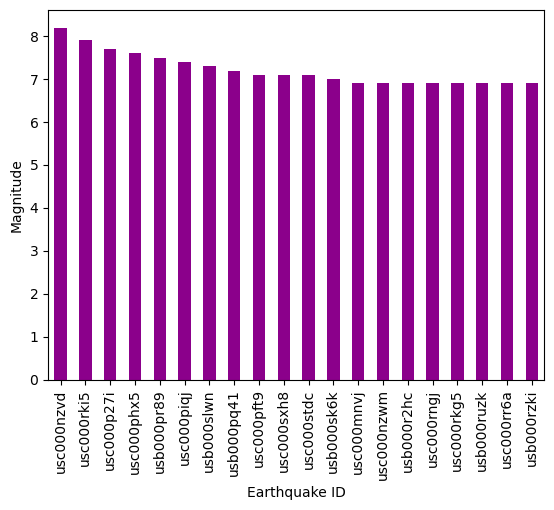

In [58]:
# b. Making a bar plot putting kind = bar
top20.plot(kind = 'bar',
          xlabel = 'Earthquake ID',
          ylabel = 'Magnitude',
          color = 'darkmagenta')

The importance of setting the ID as the index in was to be able to have identifiable information about the earthquake. Had we not, then it would have simply been the row number on the x-axis, which would have made it hard to find information about.  

# 8 
We are interested in place, magnitude and depth of the top 20 earthquakes with largest magnitude. Select this data from the `eqk` data frame.

HINT: This is a "select rows and columns simultaneously" from `eqk` exercise. To select the rows you could use the index of `top20`.

In [111]:
# using the rows as the top 20 index, and only chosing columns from depth to place (includes magnitude.)
top_20_detail = eqk.loc[top20.index, 'depth':'place']
top_20_detail


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

# 9 

Without creating any new variables, visualize the locations of eartquakes with magnitude greter than 5 by creating a scatter plot of their latitude and longitude. Make the following adjustments to the basic plot:
- update the title
- color the points by magnitude (HINT: [check the `c` parameter here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html))
- adjust the `alpha` (transparency) argument
- adjust the `colormap` argument to maket it look prettier. [Click for ideas of sequential colormaps.](https://matplotlib.org/stable/users/explain/colors/colormaps.html)


<AxesSubplot:title={'center':'Map of Earthquakes with Magnitudes Greater than 5'}, xlabel='longitude', ylabel='latitude'>

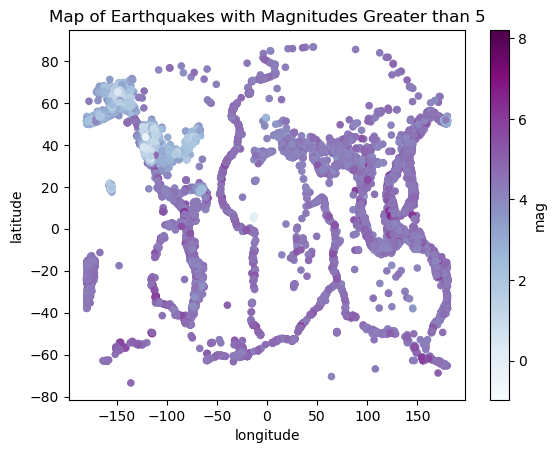

In [113]:
# first find earthquakes with magnitude greater than 5
eqk.plot(kind = 'scatter',
        x = 'longitude',
        y= 'latitude',
        c = 'mag',
        colormap = 'BuPu',
        title = 'Map of Earthquakes with Magnitudes Greater than 5')